In [1]:
from astropy.table import Table
from astropy.io import fits
from vtl.Readfile import Readfile
from astropy.cosmology import Planck13, z_at_value
from spec_id import Median_w_Error_cont
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
qgDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')
# goodss = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
#                    format = 'ascii')
# goodsn = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
#                    format = 'ascii')
# goodss_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',
#                    format = 'ascii')
# goodsn_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',
#                    format = 'ascii')

# goodss_mag = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format = 'ascii')
# goodsn_mag = Table.read('../../../Clear_data/goodsn_mosaic/goodsn_3dhstP.cat', format = 'ascii')


goodss_mag = Table.read('../../../Clear_data/goodss_3dhst.v4.3.cat', format = 'ascii')
goodsn_mag = Table.read('../../../Clear_data/goodsn_3dhst.v4.3.cat', format = 'ascii')

goodss = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                   format = 'ascii')
goodsn = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                   format = 'ascii')

In [3]:
def Mag(f125):
    return 25.0-2.5*np.log10(f125)

In [4]:
specz = [] 
photz = []
photz2 = []
photzler = []
photzher = []
jband = []
# A_v = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        specz.append(goodss['z_spec'][galDB['ids'][i]-1])
        photz.append(goodss['z_m1'][galDB['ids'][i]-1])
        photz2.append(goodss['z_peak'][galDB['ids'][i]-1])
        photzler.append(goodss['l68'][galDB['ids'][i]-1])
        photzher.append(goodss['u68'][galDB['ids'][i]-1])
        jband.append(Mag(goodss_mag['f_F125W'][galDB['ids'][i]-1]))
#         A_v.append(goodss_fast['Av'][galDB['ids'][i]-1])
        
    if galDB['gids'][i][0] == 'n':
        specz.append(goodsn['z_spec'][galDB['ids'][i]-1])
        photz.append(goodsn['z_m1'][galDB['ids'][i]-1])
        photz2.append(goodsn['z_peak'][galDB['ids'][i]-1])
        photzler.append(goodsn['l68'][galDB['ids'][i]-1])
        photzher.append(goodsn['u68'][galDB['ids'][i]-1])
        jband.append(Mag(goodsn_mag['f_F125W'][galDB['ids'][i]-1]))
#         A_v.append(goodsn_fast['Av'][galDB['ids'][i]-1])



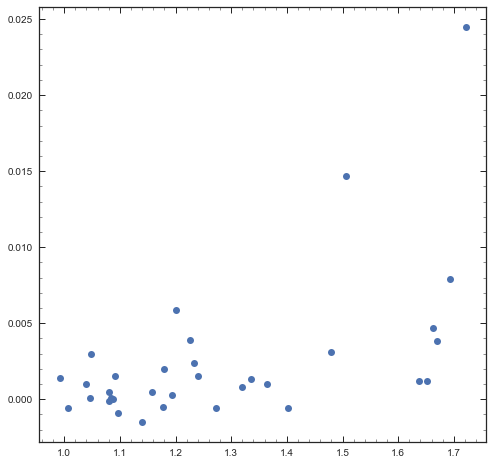

In [11]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(photz,np.array(photz) - np.array(photz2),'o')

In [19]:
np.round(photz2,2)

array([ 0.99,  1.22,  1.01,  1.2 ,  1.48,  1.09,  1.18,  1.09,  1.27,
        1.23,  1.18,  1.66,  1.08,  1.04,  1.08,  1.36,  1.16,  1.65,
        1.19,  1.24,  1.49,  1.33,  1.7 ,  1.64,  1.69,  1.04,  1.67,
        1.08,  1.05,  1.32,  1.4 ,  1.1 ,  1.14])

In [14]:
photzler

[0.95799999999999996,
 1.1830000000000001,
 0.95799999999999996,
 1.155,
 1.4239999999999999,
 1.0349999999999999,
 1.1319999999999999,
 1.052,
 1.2310000000000001,
 1.2030000000000001,
 1.143,
 1.5980000000000001,
 1.0600000000000001,
 1.006,
 1.054,
 1.3280000000000001,
 1.1259999999999999,
 1.6040000000000001,
 1.1659999999999999,
 1.212,
 1.401,
 1.298,
 1.6080000000000001,
 1.5960000000000001,
 1.6020000000000001,
 1.002,
 1.615,
 1.048,
 1.022,
 1.2869999999999999,
 1.3520000000000001,
 1.0589999999999999,
 1.0640000000000001]

In [11]:
np.round(photz,2)

array([ 0.99,  1.23,  1.01,  1.2 ,  1.48,  1.09,  1.18,  1.09,  1.27,
        1.23,  1.18,  1.66,  1.08,  1.05,  1.08,  1.36,  1.16,  1.65,
        1.19,  1.24,  1.51,  1.34,  1.72,  1.64,  1.69,  1.04,  1.67,
        1.08,  1.05,  1.32,  1.4 ,  1.1 ,  1.14])

In [12]:
A_v

[0.69999999999999996,
 0.40000000000000002,
 0.59999999999999998,
 0.80000000000000004,
 0.59999999999999998,
 0.69999999999999996,
 0.10000000000000001,
 0.29999999999999999,
 0.40000000000000002,
 0.40000000000000002,
 0.0,
 0.5,
 0.69999999999999996,
 0.5,
 0.29999999999999999,
 0.40000000000000002,
 0.10000000000000001,
 0.69999999999999996,
 0.29999999999999999,
 0.80000000000000004,
 0.80000000000000004,
 1.1000000000000001,
 1.0,
 0.40000000000000002,
 0.69999999999999996,
 0.40000000000000002,
 0.59999999999999998,
 0.5,
 0.10000000000000001,
 0.59999999999999998,
 0.29999999999999999,
 0.40000000000000002,
 0.59999999999999998]

In [11]:
np.median(A_v)

0.5

In [5]:
newids=[]

for i in galDB.index:
    
    if galDB['gids'][i][0] == 'n':
        newids.append('GND' + galDB['gids'][i][1:])
        
    if galDB['gids'][i][0] == 's':
        newids.append('GSD' + galDB['gids'][i][1:])

In [16]:
ipDB = pd.DataFrame({'gids':newids,'photz':photz2,'photz_lerr':photzler,'photz_herr':photzher,
                     'lmass':np.round(galDB['rf_lmass'],1), 'snr' : np.round(galDB['SN'],1) ,'J' : np.round(jband,1)})

In [17]:
ipDB=ipDB.sort_values(['photz'], ascending=True)

In [18]:
for i in ipDB.index:
    print '%s & $%s _ {- %s} ^ {+ %s}$ & %s & %s & %s \\\\' % (ipDB['gids'][i],np.round(ipDB['photz'][i],2),
                                            np.round(ipDB['photz'][i] - ipDB['photz_lerr'][i],2),
                                            np.round(ipDB['photz_herr'][i] -ipDB['photz'][i],2),
                                            ipDB['J'][i],ipDB['lmass'][i],ipDB['snr'][i])

GND16758 & $0.99 _ {- 0.03} ^ {+ 0.04}$ & 21.2 & 10.8 & 10.5 \\
GND19442 & $1.01 _ {- 0.05} ^ {+ 0.05}$ & 22.9 & 10.1 & 1.2 \\
GSD43615 & $1.04 _ {- 0.04} ^ {+ 0.04}$ & 21.7 & 10.7 & 7.0 \\
GSD39241 & $1.04 _ {- 0.04} ^ {+ 0.05}$ & 20.9 & 10.9 & 13.0 \\
GSD45972 & $1.05 _ {- 0.02} ^ {+ 0.03}$ & 21.1 & 10.9 & 13.2 \\
GSD44620 & $1.08 _ {- 0.03} ^ {+ 0.03}$ & 22.1 & 10.5 & 4.5 \\
GSD39631 & $1.08 _ {- 0.03} ^ {+ 0.03}$ & 21.3 & 10.7 & 9.9 \\
GSD39170 & $1.08 _ {- 0.02} ^ {+ 0.03}$ & 20.3 & 11.1 & 22.3 \\
GND34694 & $1.09 _ {- 0.03} ^ {+ 0.04}$ & 21.0 & 10.9 & 11.4 \\
GND23435 & $1.09 _ {- 0.06} ^ {+ 0.06}$ & 22.5 & 10.3 & 3.3 \\
GSD47677 & $1.1 _ {- 0.04} ^ {+ 0.04}$ & 22.5 & 10.2 & 3.7 \\
GSD48631 & $1.14 _ {- 0.08} ^ {+ 0.06}$ & 21.2 & 10.9 & 6.1 \\
GSD39805 & $1.16 _ {- 0.03} ^ {+ 0.03}$ & 22.5 & 10.5 & 3.6 \\
GSD38785 & $1.18 _ {- 0.03} ^ {+ 0.04}$ & 21.5 & 10.8 & 7.1 \\
GND32566 & $1.18 _ {- 0.05} ^ {+ 0.05}$ & 21.7 & 10.6 & 6.0 \\
GSD40476 & $1.19 _ {- 0.03} ^ {+ 0.03}$ & 21.9 & 10

In [6]:
grisz_ler = []
grisz_her = []
for i in galDB.index:
    z,P = np.load('../rshift_dat/%s_hires_Pofz.npy' % galDB['gids'][i])
    med,ler,her=Median_w_Error_cont(P,z)
    grisz_ler.append(np.round(ler,3))
    grisz_her.append(np.round(her,3))

In [7]:
dust_Z = []
dust_t = []

for i in galDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_lwa_dust.npy' % galDB['gids'][i])
    dust_Z.append(Median_w_Error_cont(PZ,Z))
    t,Pt = np.load('../chidat/%s_dtau_t_pos_lwa_dust.npy' % galDB['gids'][i])
    dust_t.append(Median_w_Error_cont(Pt,t))
    
dust_Z = np.array(dust_Z).T
dust_t = np.array(dust_t).T

In [11]:
dust_t

array([[ 3.9168337,  2.0430862,  2.5831663,  2.0981964,  2.3296593,
         3.1122244,  2.0320641,  2.8036072,  3.0681363,  2.8036072,
         2.0541082,  1.8777555,  2.2194389,  2.506012,  3.993988,
         3.0571142,  1.987976,  1.9769539,  1.9659319,  2.2635271,
         2.506012,  1.1613226,  1.8226453,  1.5470942,  1.4809619,
         3.9609218,  2.2084168,  1.9438878,  3.6853707,  3.4649299,
         2.6713427,  3.0901804,  3.0791583],
       [ 0.71643287,  0.51803607,  0.77154309,  0.41883768,  0.58416834,
         0.76052104,  0.68336673,  0.46292585,  0.4739479,  0.85971944,
         0.24248497,  0.3747495,  1.0250501,  0.52905812,  0.96993988,
         0.56212425,  0.35270541,  0.29759519,  0.46292585,  0.099198397,
         0.50701403,  0.11022044,  0.40781563,  0.28657315,  0.42985972,
         0.60621242,  0.14328657,  0.56212425,  0.87074148,  0.57314629,
         0.50701403,  0.61723447,  0.49599198],
       [ 0.749499,  0.57314629,  1.0581162,  0.30861723,  0.5841683

In [8]:

opDB = pd.DataFrame({'gids':newids,'grisz':galDB['hi_res_specz'], 'grisz_ler':grisz_ler,'grisz_her':grisz_her,
                     'Z':np.round(galDB['Zx_lwa']/0.019,2),'Z_+_sig':np.round(galDB['Zx_+_sig_lwa']/0.019,2),
                     'Z_-_sig':np.round(galDB['Zx_-_sig_lwa']/0.019,2),
                     't':np.round(galDB['tx_lwa'],2),'t_+_sig':np.round(galDB['tx_+_sig_lwa'],2),
                     't_-_sig':np.round(galDB['tx_-_sig_lwa'],2),                     
                     'd-Z':np.round(dust_Z[0]/0.019,2),'d-Z_+_sig':np.round(dust_Z[2]/0.019,2),
                     'd-Z_-_sig':np.round(dust_Z[1]/0.019,2),
                     'd-t':np.round(dust_t[0],2),'d-t_+_sig':np.round(dust_t[2],2),
                     'd-t_-_sig':np.round(dust_t[1],2)})

In [9]:
opDB=opDB.sort_values(['grisz'], ascending=True)

In [10]:
for i in opDB.index:
    print '%s & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ \\\\' % \
          (opDB['gids'][i],opDB['grisz'][i],opDB['grisz_ler'][i], opDB['grisz_her'][i],
            opDB['Z'][i],opDB['Z_-_sig'][i],opDB['Z_+_sig'][i],
            opDB['t'][i],opDB['t_-_sig'][i],opDB['t_+_sig'][i],
            opDB['d-Z'][i],opDB['d-Z_-_sig'][i],opDB['d-Z_+_sig'][i],
            opDB['d-t'][i],opDB['d-t_-_sig'][i],opDB['d-t_+_sig'][i])
#  opDB[['gids','specz','Z','Z_+_sig','Z_-_sig','t','t_+_sig','t_-_sig']].to_latex(index=False)

GND16758 & $1.014_{-0.0}^{+0.001}$ & $1.06_{-0.07}^{+0.15}$ & $5.24_{-0.52}^{+0.29}$ & $0.73_{-0.1}^{+0.14}$ & $3.92_{-0.72}^{+0.75}$ \\
GSD48631 & $1.016_{-0.137}^{+0.005}$ & $1.4_{-0.2}^{+0.13}$ & $4.61_{-0.6}^{+0.54}$ & $1.27_{-0.84}^{+0.24}$ & $2.88_{-0.25}^{+0.5}$ \\
GSD43615 & $1.016_{-0.001}^{+0.004}$ & $1.4_{-0.19}^{+0.13}$ & $4.84_{-0.52}^{+0.46}$ & $1.12_{-0.25}^{+0.29}$ & $3.96_{-0.61}^{+0.77}$ \\
GSD39241 & $1.019_{-0.001}^{+0.002}$ & $1.16_{-0.17}^{+0.21}$ & $4.23_{-0.53}^{+0.61}$ & $1.24_{-0.34}^{+0.24}$ & $2.51_{-0.53}^{+0.52}$ \\
GSD39170 & $1.022_{-0.001}^{+0.0}$ & $1.23_{-0.22}^{+0.22}$ & $2.98_{-0.4}^{+0.45}$ & $1.51_{-0.1}^{+0.05}$ & $2.22_{-1.03}^{+0.28}$ \\
GSD45972 & $1.038_{-0.001}^{+0.002}$ & $0.62_{-0.15}^{+0.15}$ & $4.03_{-0.84}^{+0.69}$ & $0.55_{-0.2}^{+0.25}$ & $3.69_{-0.87}^{+0.68}$ \\
GSD39631 & $1.053_{-0.002}^{+0.004}$ & $0.91_{-0.17}^{+0.34}$ & $4.03_{-0.65}^{+0.78}$ & $0.37_{-0.13}^{+0.42}$ & $3.99_{-0.97}^{+0.87}$ \\
GND19442 & $1.101_{-0.095}^{+0.06

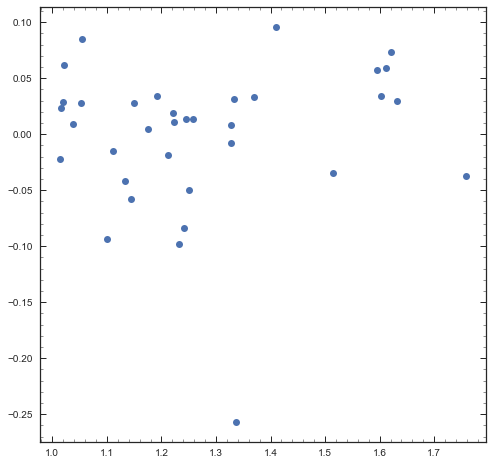

In [45]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(galDB['hi_res_specz'],photz-galDB['hi_res_specz'],'o')